# **Cleaning the Data**

In [ ]:
# importing libraries
import pandas as pd

# importing the csv file and putting the wanted data into a dataframe
filename = 'data.csv'
cols = ['Route', 'Average Weekday Ridership, 2011', 'Average Weekday Ridership, 2016', 'Ridership Change, 2011-2016', '# of Stops along Route', 'Bus Stops within .1 Miles of a Subway Station', 'Borough']
file = pd.read_csv(filename, usecols = cols) # only using the selected columns
df = pd.DataFrame(file)

print(df)

# removing the last few rows
df = df.drop(df.tail(8).index)

# renaming the columns of the dataframe
new_cols = ['Route', 'Avg. 2011 Ridership', 'Avg. 2016 Ridership', 'Ridership Change', '# of Stops', '# of Stops near Subway', 'Borough']
new_names = {}
count = 0
for name in cols:
    new_names[name] = new_cols[count]
    count += 1

df = df.rename(columns= new_names)

# creating a series
new_dict = {}
for name in new_cols:
    new_dict[name] = []

# putting all the values from the dataframe into th series to alter the data
for i in range(len(df)):
    for col in new_cols:
        new_dict[col].append(df[col][i])

# change the data type for the numerical values
for i in range(len(df)):
    route = new_dict['Route'][i]
    if '*' in new_dict['Route'][i]:
        new_dict['Route'][i] = route.replace('*', '')

    num = new_dict['Avg. 2011 Ridership'][i]
    new_dict['Avg. 2011 Ridership'][i] = int(num.replace(',', ''))

    num = new_dict['Avg. 2016 Ridership'][i]
    new_dict['Avg. 2016 Ridership'][i] = int(num.replace(',', ''))

1# putting the dictionary into a dataframe
for key in new_dict:
    df[key] = new_dict[key]

print(df)

df.to_csv('new_data.csv', index = False)



             Route Average Weekday Ridership, 2011  \
0              BX1                          38,891   
1              BX2                          38,891   
2              BX3                          15,800   
3              BX4                          12,141   
4             BX4A                          12,141   
..             ...                             ...   
255         Queens                         703,270   
256  Staten Island                          91,960   
257            NYC                       2,463,860   
258            NaN                             NaN   
259            NaN                             NaN   

    Average Weekday Ridership, 2016 Ridership Change, 2011-2016  \
0                            36,487                         -6%   
1                            36,487                         -6%   
2                            14,921                         -6%   
3                            11,411                         -6%   
4               

# **Linear Regression**

    Route  Avg. 2011 Ridership  Avg. 2016 Ridership Ridership Change  \
0     BX1                38891                36487              -6%   
1     BX2                38891                36487              -6%   
2     BX3                15800                14921              -6%   
3     BX4                12141                11411              -6%   
4    BX4A                12141                11411              -6%   
..    ...                  ...                  ...              ...   
247   S92                 4923                 4431             -10%   
248   S93                 1646                 3686             124%   
249   S94                 6755                 7016               4%   
250   S96                 7126                 7299               2%   
251   S98                 7765                 7702              -1%   

     # of Stops  # of Stops near Subway        Borough  
0          47.0                    19.0          Bronx  
1          50.0      

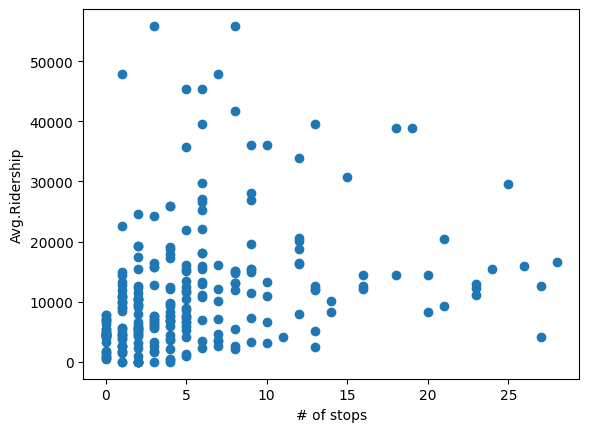

coefficient of determination: 0.09086246390383057
intercept: 8481.170623919268
slope: [534.38132771]
predicted response:
[18634.41585034 18100.03452264 10084.31460704 17031.27186722
 15428.1278841  10618.69593475 11687.45859016 12756.22124557
 10618.69593475 13290.60257328 11153.07726245 11687.45859016
 11687.45859016 11153.07726245  9549.93327933 14893.7465564
 11153.07726245 12221.83991787 10084.31460704 16496.89053952
 11153.07726245 12756.22124557 10084.31460704  9549.93327933
 10618.69593475 10618.69593475 10618.69593475 13290.60257328
  9015.55195163  9549.93327933  9549.93327933 13824.98390099
 13290.60257328 10618.69593475 11153.07726245 11687.45859016
 13290.60257328 14893.7465564  10618.69593475  9549.93327933
  9549.93327933 10618.69593475  9549.93327933 14893.7465564
  9015.55195163 11687.45859016 12221.83991787 12756.22124557
 10618.69593475 13290.60257328 11153.07726245 11153.07726245
 10618.69593475 15428.1278841  11153.07726245 11153.07726245
 11687.45859016  9015.55195

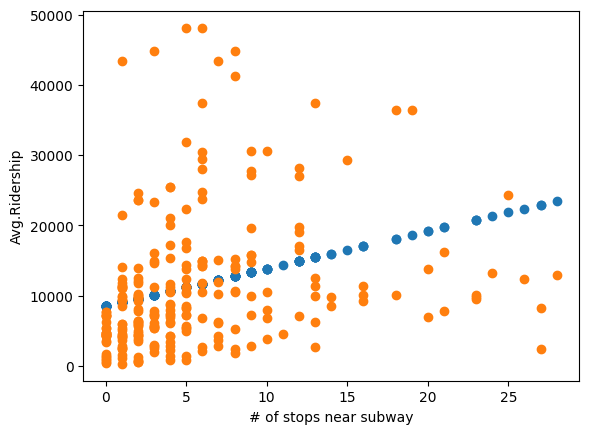

               Avg. 2011 Ridership  Avg. 2016 Ridership
Borough                                                
Bronx                 15522.395349         15981.372093
Brooklyn              13266.625000         12629.928571
Manhattan             14949.000000         12451.121951
Queens                 8912.481481          8991.456790
Staten Island          4573.483871          4642.419355


<Axes: xlabel='Borough'>

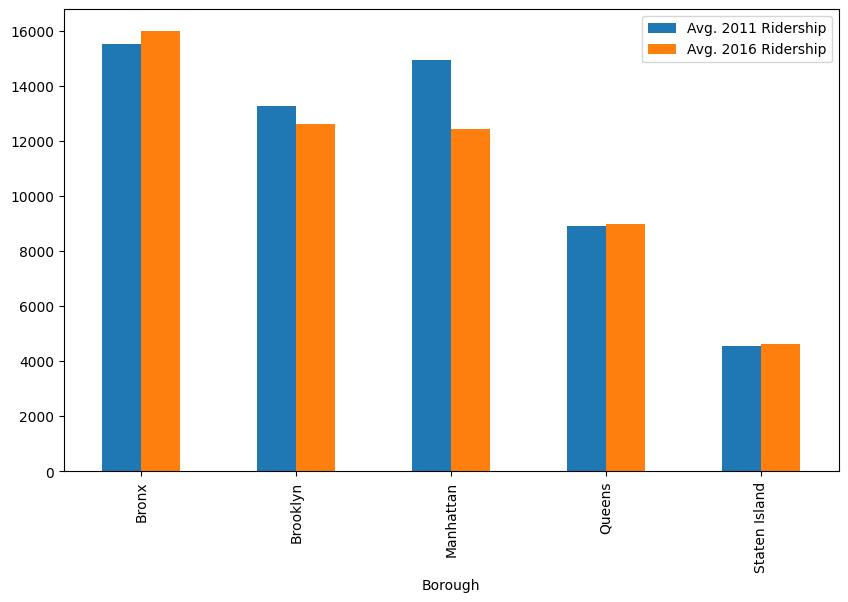

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix

filename = 'new_data.csv'
file = pd.read_csv(filename)
df = pd.DataFrame(file)
print(df)

x = np.array(df['# of Stops near Subway']).reshape(-1,1)
y = np.array(df['Avg. 2011 Ridership'])

plt.scatter(x, y)
plt.xlabel('# of stops')
plt.ylabel('Avg.Ridership')
plt.show()

model = LinearRegression().fit(x,y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

plt.scatter(x, y_pred)
plt.xlabel('# of stops near subway')
plt.ylabel('Avg.Ridership')

plt.scatter(x, df['Avg. 2016 Ridership'])
plt.show()

borough = df[['Avg. 2011 Ridership', 'Avg. 2016 Ridership', 'Borough']].groupby(['Borough']).mean()
print(borough)
borough.plot(kind='bar', stacked=False, figsize=(10, 6))

# **Logarithmic Regression**

In [ ]:
##Logarithmic regression model

In [ ]:
##Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import mode

In [ ]:
##Read csv from path
dataset = pd.read_csv('new_data.csv')

In [ ]:
##Check csv original
dataset.head()

,Route,Avg. 2011 Ridership,Avg. 2016 Ridership,Ridership Change,# of Stops,# of Stops near Subway,Borough
0,BX1,38891,36487,-6%,47.0,19.0,Bronx
1,BX2,38891,36487,-6%,50.0,18.0,Bronx
2,BX3,15800,14921,-6%,28.0,3.0,Bronx
3,BX4,12141,11411,-6%,32.0,16.0,Bronx
4,BX4A,12141,11411,-6%,35.0,13.0,Bronx


In [ ]:
## FORMATTING COLUMNS
##drop route coulmn
dataset = dataset.drop('Route', axis=1)
##drop Avg. 2011 Ridership coulmn
dataset = dataset.drop('Avg. 2011 Ridership', axis=1)
##drop Ridership Change % coulmn
dataset = dataset.drop('Ridership Change', axis=1)
##drop # of Stops coulmn
dataset = dataset.drop('# of Stops', axis=1)
##drop Borough coulmn
dataset = dataset.drop('Borough', axis=1)

In [ ]:
dataset.head()

,Avg. 2016 Ridership,# of Stops near Subway
0,36487,19.0
1,36487,18.0
2,14921,3.0
3,11411,16.0
4,11411,13.0


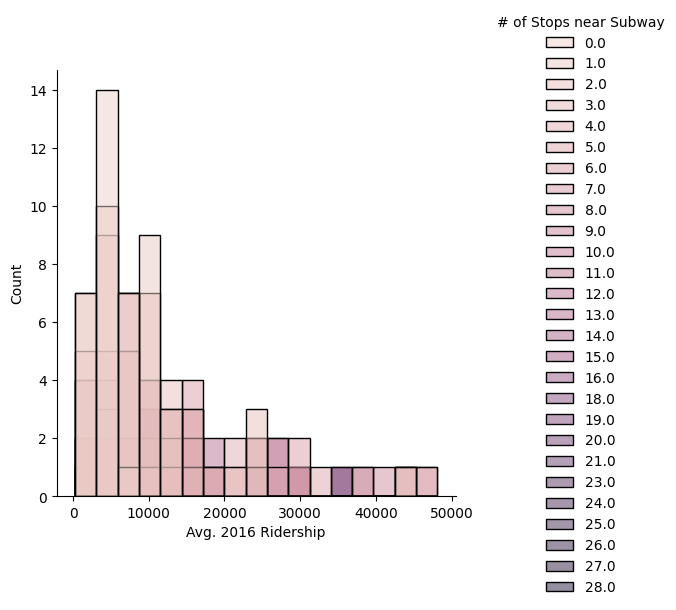

In [ ]:
##Visualize data
sns.displot(dataset, x = 'Avg. 2016 Ridership', hue = '# of Stops near Subway')

In [ ]:
##Split Data
Y = dataset.drop('# of Stops near Subway', axis=1)
X = dataset['# of Stops near Subway']
ln_Y = np.log(Y)

In [ ]:
print(X)
print(Y)

0      19.0
1      18.0
2       3.0
3      16.0
4      13.0
       ... 
247     0.0
248     1.0
249     0.0
250     0.0
251     0.0
Name: # of Stops near Subway, Length: 252, dtype: float64
     Avg. 2016 Ridership
0                  36487
1                  36487
2                  14921
3                  11411
4                  11411
..                   ...
247                 4431
248                 3686
249                 7016
250                 7299
251                 7702

[252 rows x 1 columns]


In [ ]:
### Use the relation ln(Y) = ln(A) - BX to fit X to ln(Y)
exp_reg = LinearRegression()
exp_reg.fit(X.values.reshape(-1,1), ln_Y)

LinearRegression()

In [ ]:
exp_reg_weighted = LinearRegression()
exp_reg_weighted.fit(X.values.reshape(-1,1), ln_Y, sample_weight=np.array(1/((X - 100).values**2)).reshape(-1))

LinearRegression()

In [ ]:
### Get predicted values of Y
Y_pred = np.exp(exp_reg.predict(X.values.reshape(-1,1)))
Y_pred_weighted = np.exp(exp_reg_weighted.predict(X.values.reshape(-1,1)))

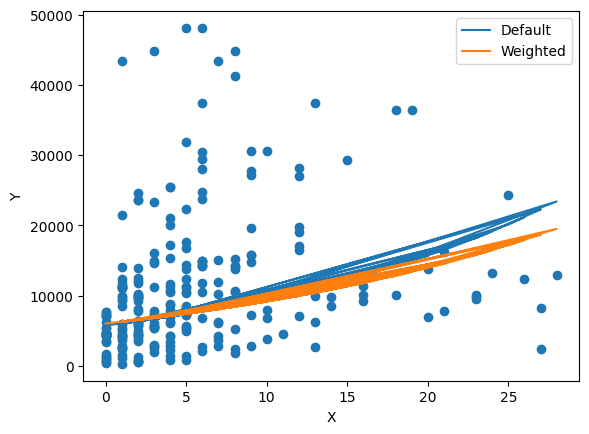

In [ ]:
### Plot
plt.scatter(X, Y)
plt.plot(X, Y_pred, label='Default')
plt.plot(X, Y_pred_weighted, label='Weighted')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()

In [ ]:
#Confusion matrix example

## from sklearn.metrics import confusion_matrix
## confusion_matrix(Y_test,Y_pred)

# ***Clustering***

In [ ]:
# Importing important libraries/packages
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

### Loading Data

In [ ]:
# Loading data
clustering_data = pd.read_csv("/content/new_data.csv")
clustering_data

,Route,Avg. 2011 Ridership,Avg. 2016 Ridership,Ridership Change,# of Stops,# of Stops near Subway,Borough
0,BX1,38891,36487,-6%,47.0,19.0,Bronx
1,BX2,38891,36487,-6%,50.0,18.0,Bronx
2,BX3,15800,14921,-6%,28.0,3.0,Bronx
3,BX4,12141,11411,-6%,32.0,16.0,Bronx
4,BX4A,12141,11411,-6%,35.0,13.0,Bronx
...,...,...,...,...,...,...,...
247,S92,4923,4431,-10%,39.0,0.0,Staten Island
248,S93,1646,3686,124%,21.0,1.0,Staten Island
249,S94,6755,7016,4%,39.0,0.0,Staten Island
250,S96,7126,7299,2%,38.0,0.0,Staten Island


In [ ]:
# dropping percent change
clustering_data = clustering_data.drop('Ridership Change', axis=1)

### Standardizing Data

In [ ]:
# Select relevant features for clustering
selected_features = ['Avg. 2011 Ridership',
                     'Avg. 2016 Ridership',
                     '# of Stops',
                     '# of Stops near Subway']

# Normalize/standardize the selected features
scaler = StandardScaler()
standardized_data = scaler.fit_transform(clustering_data[selected_features])

### Hyper-Parameter Tuning

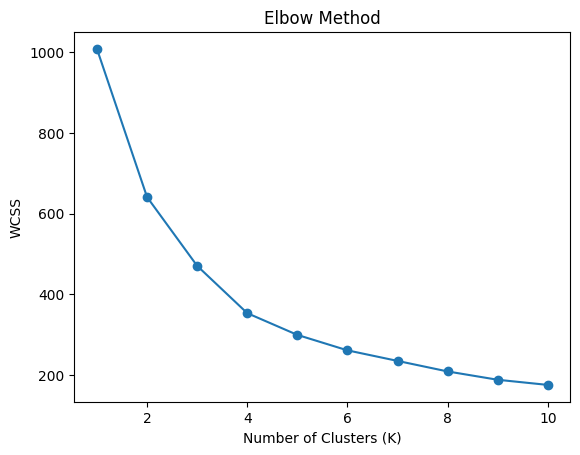

In [ ]:
# Using the Elbow method - Trying different values of K

wcss = [] # within cluster sum-of-squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


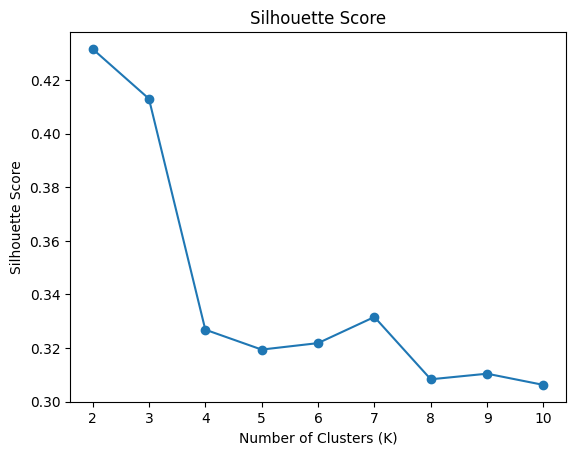

In [ ]:
# Using Silhouette Score Method

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(standardized_data)
    silhouette_scores.append(silhouette_score(standardized_data, cluster_labels))

# Plot the Silhouette Score graph
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

### Applying the KMeans Clustering with K=5

In [ ]:
# Choose the number of clusters (K)
num_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clustering_data['cluster'] = kmeans.fit_predict(standardized_data)

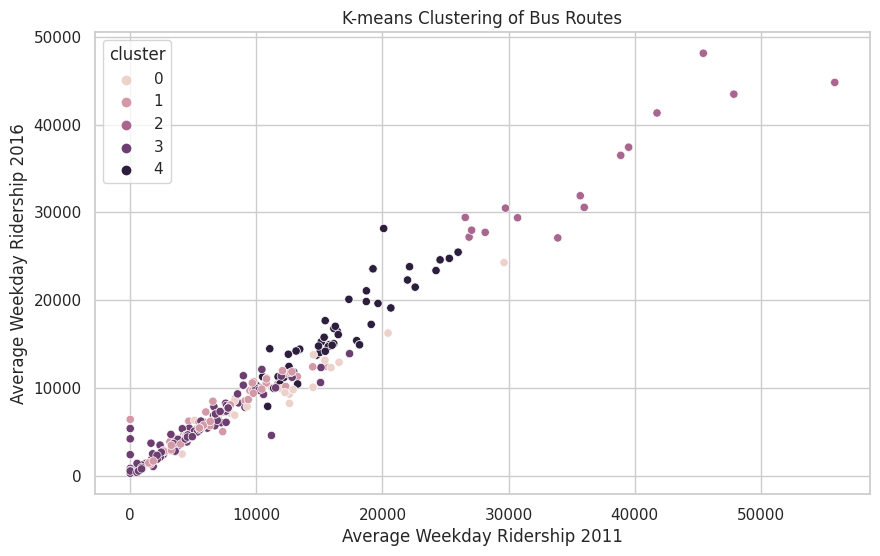

In [ ]:
# Visualize the clusters (2D scatter plot)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg. 2011 Ridership', y='Avg. 2016 Ridership', hue='cluster', data=clustering_data)
plt.title('K-means Clustering of Bus Routes')
plt.xlabel('Average Weekday Ridership 2011')
plt.ylabel('Average Weekday Ridership 2016')
plt.show()

### Exploring Cluster Characteristics

         Avg. 2011 Ridership  Avg. 2016 Ridership  # of Stops  \
cluster                                                         
0               12746.772727         10436.136364   56.545455   
1                7109.044118          7036.808824   55.264706   
2               38455.333333         35909.142857   44.380952   
3                4987.454545          4955.136364   25.886364   
4               16541.320755         16584.000000   43.396226   

         # of Stops near Subway  
cluster                          
0                     20.000000  
1                      2.735294  
2                      8.619048  
3                      2.886364  
4                      6.452830  


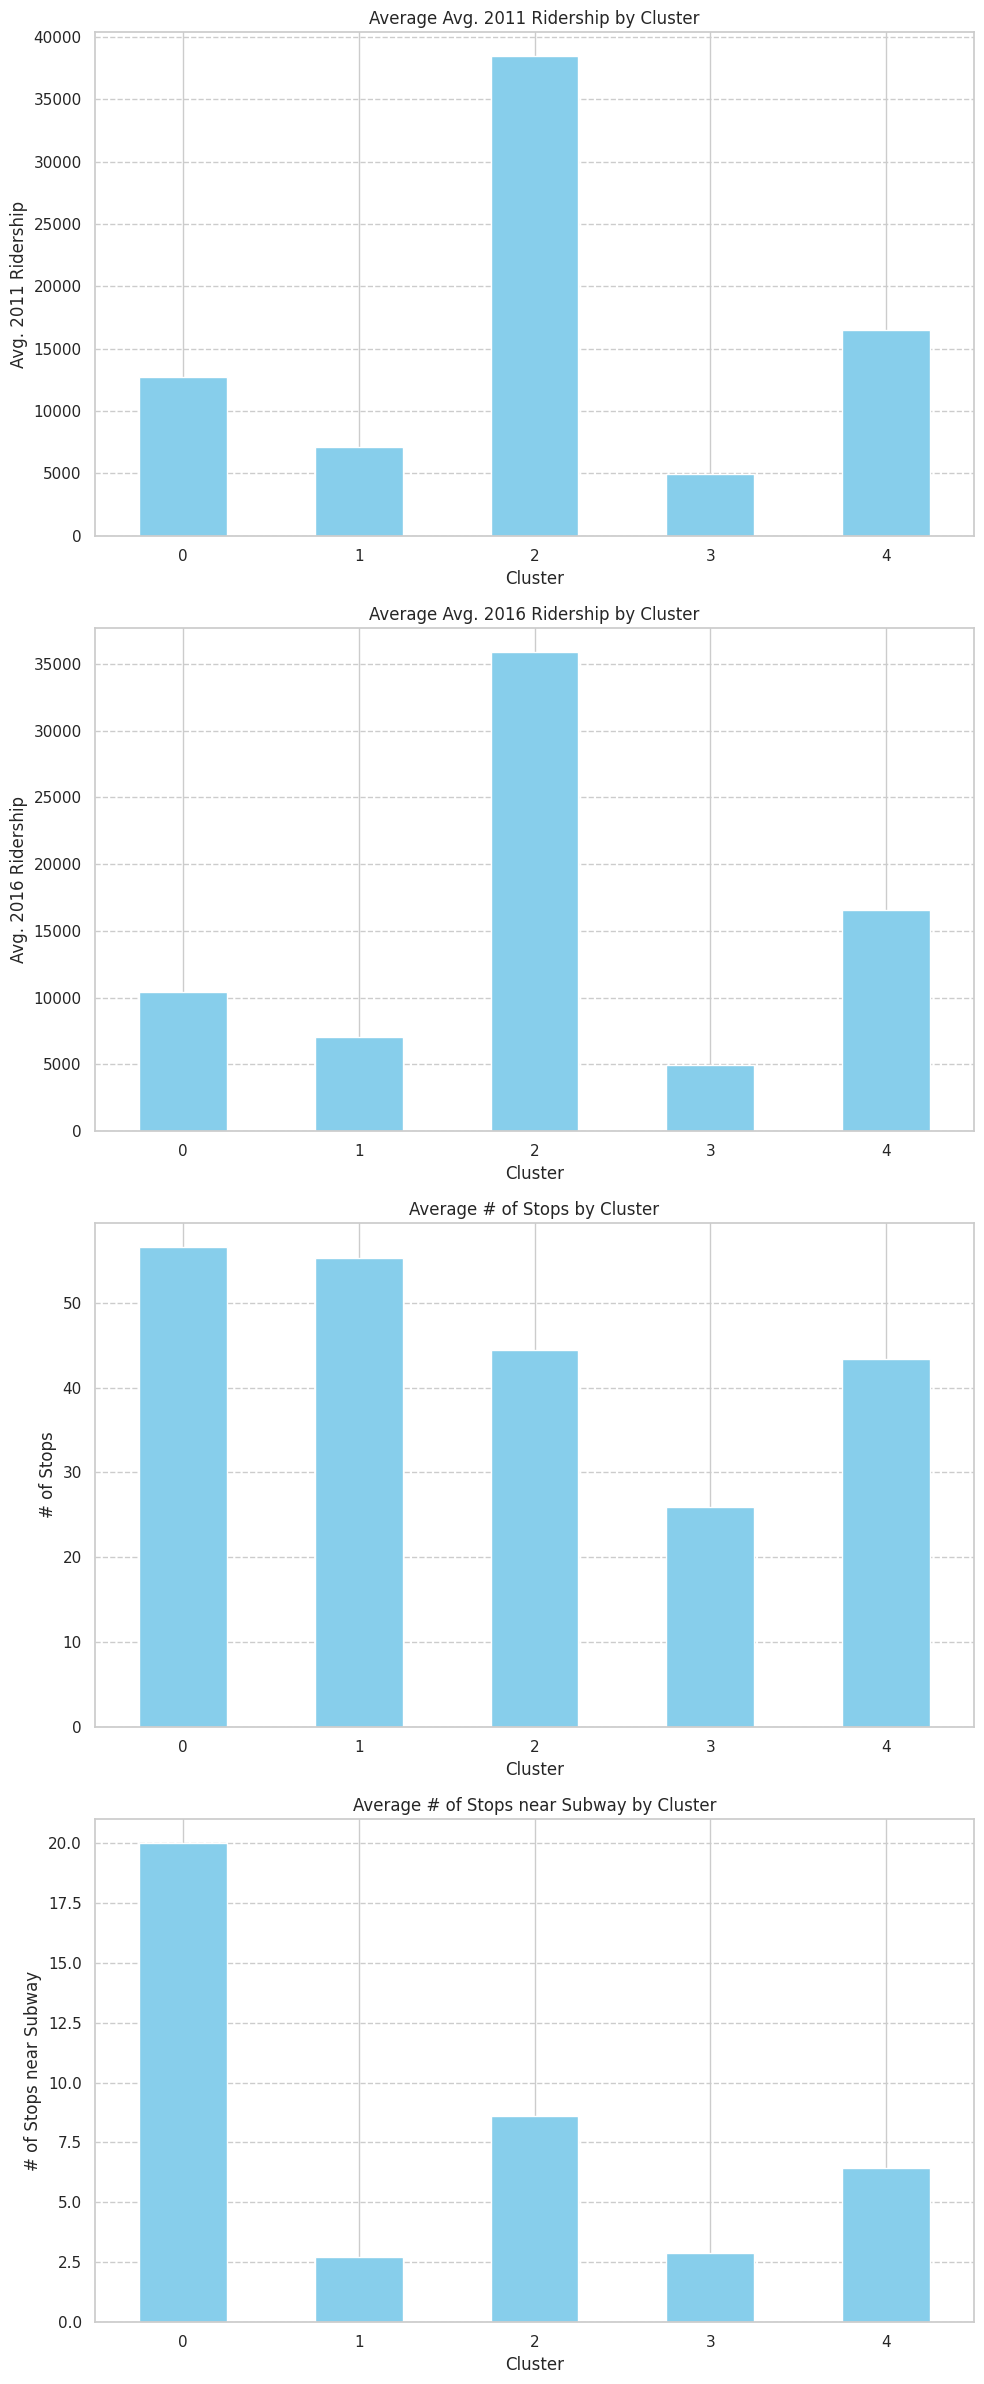

In [ ]:
# Explore cluster characteristics
cluster_summary = clustering_data.groupby('cluster')[selected_features].mean()
print(cluster_summary)

# Plot the cluster characteristics
fig, axes = plt.subplots(nrows=len(selected_features), ncols=1, figsize=(10, 6 * len(selected_features)))

for idx, feature in enumerate(selected_features):
    ax = axes[idx]
    cluster_summary[feature].plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Average {feature} by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(feature)
    ax.set_xticklabels(cluster_summary.index, rotation=0)
    ax.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

Borough  Bronx  Brooklyn  Manhattan  Queens  Staten Island
cluster                                                   
0            1         5         12       4              0
1            3        14          1      32             18
2            7         8          4       2              0
3           13        14         17      31             13
4           19        15          7      12              0


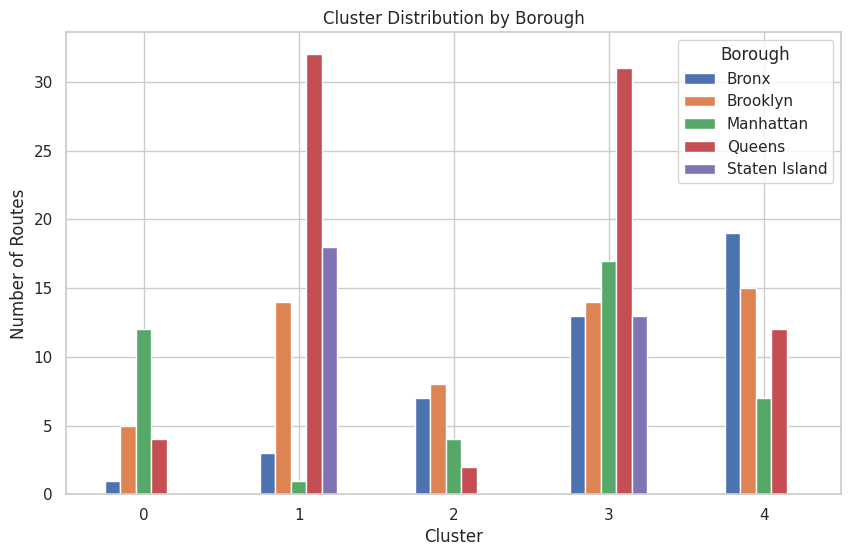

In [ ]:
# Profile each cluster based on additional features (e.g., Borough)
borough_distribution = clustering_data.groupby(['cluster', 'Borough']).size().unstack(fill_value=0)
print(borough_distribution)

# Plot the bar chart
borough_distribution.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Cluster Distribution by Borough')
plt.xlabel('Cluster')
plt.ylabel('Number of Routes')
plt.legend(title='Borough', loc='upper right')
plt.xticks(rotation=0)
plt.show()

### Model Evaluation

In [ ]:
# Evaluating silhouette score
# Higher silhouette scores indicate better-defined clusters.

silhouette_avg = silhouette_score(standardized_data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3194076330569152


In [ ]:
# Evaluating Inertia (within-cluster sum of squares)
# Lower inertia values indicate tighter and more compact clusters.
inertia = kmeans.inertia_
print("Inertia:", inertia)


Inertia: 299.38536197832696
